# Random Graphs: The Erdős–Rényi and Stochastic Block Models

#### Authors:

v1.0 (2014 Fall) Rishi Sharma, Sahaana Suri, Kangwook Lee, Kannan Ramchandran<br />
v1.1 (2015 Fall) Kabir Chandrasekher, Max Kanwal, Kangwook Lee, Kannan Ramchandran<br />
v1.2 (2016 Fall) Kabir Chandrasekher, Tony Duan, David Marn, Ashvin Nair, Kangwook Lee, Kannan Ramchandran <br />
v1.3 (2018 Spring) Tavor Baharav, Kaylee Burns, Gary Cheng, Sinho Chewi, Hemang Jangle, William Gan, Alvin Kao, Chen Meng, Vrettos Muolos, Kanaad Parvate, Ray Ramamurti <br />
v1.4 (2018 Fall) Raghav Anand, Kurtland Chua, Payam Delgosha, William Gan, Avishek Ghosh, Justin Hong, Nikunj Jain, Katie Kang, Adarsh Karnati, Eric Liu, Kanaad Parvate, Ray Ramamurti, Amay Saxena, Kannan Ramchandran, Abhay Parekh <br />

## Question 1 -- The Erdős–Rényi Model

To begin the lab, we explore random graphs, introduced by [Erdős and Rényi](http://www.renyi.hu/~p_erdos/1959-11.pdf).  -- $G(n,p)$ has $n$ nodes and probability $p$ of an edge between each node.

You will need to install [NetworkX](http://networkx.github.io/documentation/latest/install.html) in order to complete this lab. If you have difficulty installing it, you can follow a StackOverflow thread available [here](http://stackoverflow.com/questions/9836909/easy-install-networkx), or simply download NetworkX from the previous link and pip install it from downloads. Many of you may already have NetworkX because it comes default with the Anaconda installation of iPython.

We provide the following basic imports as well as a function written to draw graphs for you. The structure of a graph object is a collection of edges, in (node1, node2) form. You should know how to use `draw_graph`, but you don't really need to know how it works. Play around with it and look at those pretty graphs :)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [3]:
def draw_graph(graph, labels=None, graph_layout='shell',
               node_size=3200, node_color='blue', node_alpha=0.3,
               node_text_size=24,
               edge_color='blue', edge_alpha=0.3, edge_tickness=2,
               edge_text_pos=0.6,
               text_font='sans-serif'):
    G=nx.Graph()
    for edge in graph:
        G.add_edge(edge[0], edge[1])
    # These are different layouts for the network you may try.
    # Shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)
    plt.show()

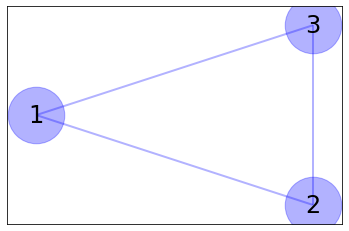

In [4]:
graph = [(1,2),(2,3),(1,3)]
draw_graph(graph)

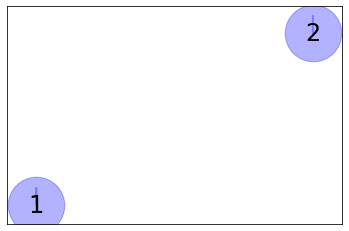

In [5]:
graph = [(1,1),(2,2)]
draw_graph(graph) # no self-loops, so put a self-loop if you want a disconnected node

Lets create a function that returns all the nodes that can be reached from a certain starting point given the representation of a graph above.

### 1a. Fill out the following method to find the set of connected components from a starting node on a graph.

In [6]:
def find_connected_component(graph, starting_node):
    """
    >>> graph = [(1,2),(2,3),(1,3)]
    >>> find_connected_component(graph,1)
    {1, 2, 3}
    >>> graph = [(1,1),(2,3),(2,4),(3,5),(3,6),(4,6),(1,7),(7,8),(1,8)]
    >>> find_connected_component(graph,1)
    {1, 7, 8}
    >>> find_connected_component(graph,2)
    {2, 3, 4, 5, 6}
    """
    connected_nodes = set()
    connected_nodes.add( starting_node )
    
    changed_flag = True
    while changed_flag:
        changed_flag = False
        for node1,node2 in graph: # iterate over edges
            if (node1 in connected_nodes and node2 not in connected_nodes) or \
                (node1 not in connected_nodes and node2 in connected_nodes):
                # YOUR CODE HERE
                connected_nodes.add( node1)
                connected_nodes.add( node2 )
                changed_flag = True
    
    return connected_nodes

In [7]:
graph = [(1,2),(2,3),(1,3)]
find_connected_component(graph,1)

{1, 2, 3}

In [8]:
graph = [(1,1),(2,3),(2,4),(3,5),(3,6),(4,6),(1,7),(7,8),(1,8)]
# draw_graph(graph)
find_connected_component(graph,1)

{1, 7, 8}

In [9]:
find_connected_component(graph,2)

{2, 3, 4, 5, 6}

### 1b. Fill out the following method that takes and returns all the connected components of the graph.

You may want to use the function you wrote above.

In [10]:
def connected_components(graph):
    """
    >>> graph = [(1,1),(2,3),(2,4),(3,5),(3,6),(4,6),(1,7),(7,8),(1,8)]
    >>> connected_components(graph)
    [{1, 7, 8}, {2, 3, 4, 5, 6}]
    >>> largest_component_size(graph)
    5
    """
    nodes = set()
    components = []
    for edge in graph:
        for node in edge:
            nodes.add(node)
    for node in nodes:
        flag = False
        for component in components:
            if node in component:
                flag = True
                break
        if not flag:
            # YOUR CODE HERE
            components.append(find_connected_component(graph, node))
    return components

In [11]:
# These guys should work after you've implemented connected_components
component_sizes = lambda graph: [len(component) for component in (connected_components(graph))]
largest_component_size = lambda graph: max(component_sizes(graph))

In [12]:
print(connected_components(graph))
print(largest_component_size(graph))

[{8, 1, 7}, {2, 3, 4, 5, 6}]
5


Next, we want to create a function that, given the number of nodes in a graph, will randomly generate edges between nodes. That is, we want to construct a random graph following the Erdős–Rényi model.

### 1c. Fill out the following function to create an Erdős–Rényi random graph $G(n,p)$.

In [17]:
def G(n,p):
    graph = [] 
    # Recall that we describe a graph as a list enumerating all edges. Node names can be numbers.
    
    for i in range(n):
        graph.append((i,i))
    for i in range(n):
        for j in range(i+1,n):
            if np.random.rand() < p:
                # YOUR CODE HERE
                graph.append((i, j))
    
    return graph

Make sure you can see all nodes from 1 to 10 in the graph below -- if not, check your code!

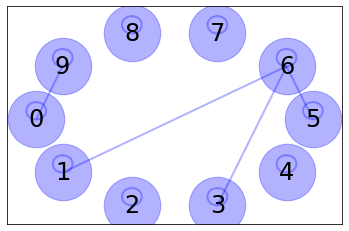

In [18]:
graph = G(10,0.1)
draw_graph(graph)

## Question 2 -- Phase Transitions!

Now let's examine some of the qualitative properties of a random graph developed in the original Erdős & Rényi paper.

(You don't need to code anything for this question).

In [19]:
epsilon = 1/100

#### Transition 1: If $np < 1$, then a graph in $\operatorname{G}(n, p)$ will almost surely have no connected components of size larger than $\operatorname{O}(\log(n))$

In [20]:
largest_sizes = []
n = 50
p = 1/50 - epsilon
for i in range(1000):
    graph = G(n,p)
    largest_sizes.append(largest_component_size(graph))
    
print("We expect the largest component size to be on the order of: ", np.log2(n))
print("True average size of the largest component: ", np.mean(largest_sizes))

We expect the largest component size to be on the order of:  5.643856189774724
True average size of the largest component:  4.91


Let's check a visualization of the last graph we generated:

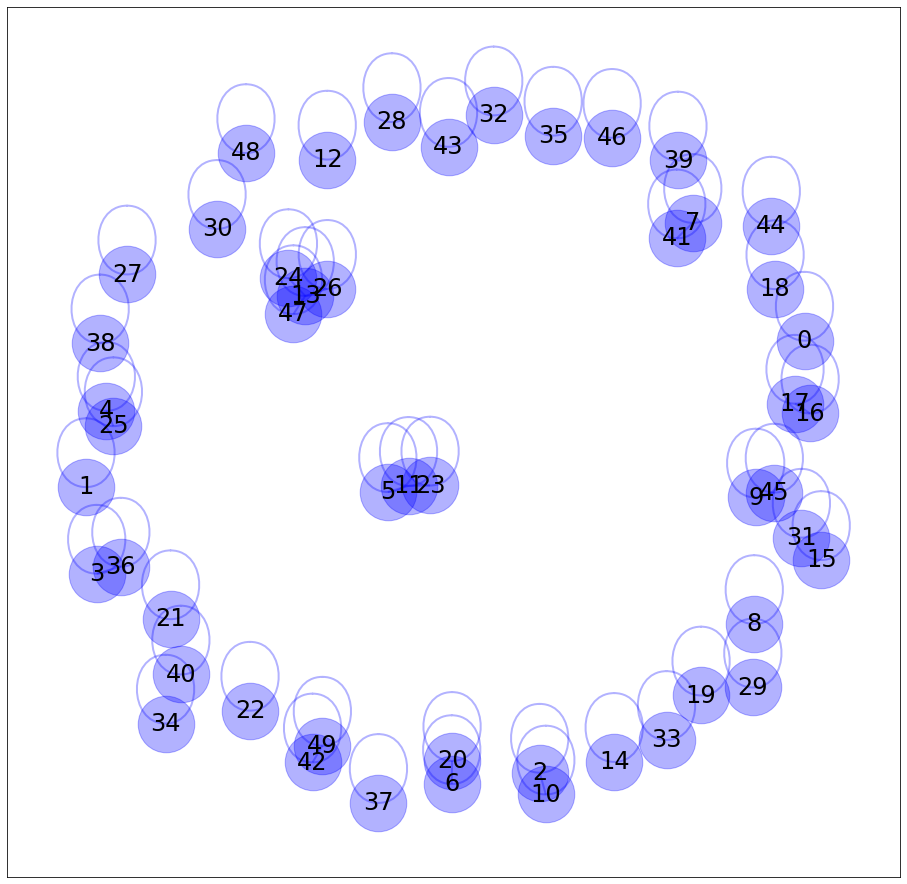

In [21]:
plt.figure(figsize=(16, 16))
draw_graph(graph, graph_layout='spring')

#### Transition 2: If $np = 1$, then a graph in $\operatorname{G}(n, p)$ will almost surely have a largest component whose size is of order $n^{2/3}$.

In [22]:
largest_sizes = []
n = 50
p = 1/50
for i in range(1000):
    graph = G(n,p)
    largest_sizes.append(largest_component_size(graph))

print("We expect the largest componenet size to be on the order of: ", n**(2/3))
print("True average size of the largest componenent: ", np.mean(largest_sizes))

We expect the largest componenet size to be on the order of:  13.572088082974531
True average size of the largest componenent:  12.522


We can see this largest component visually:

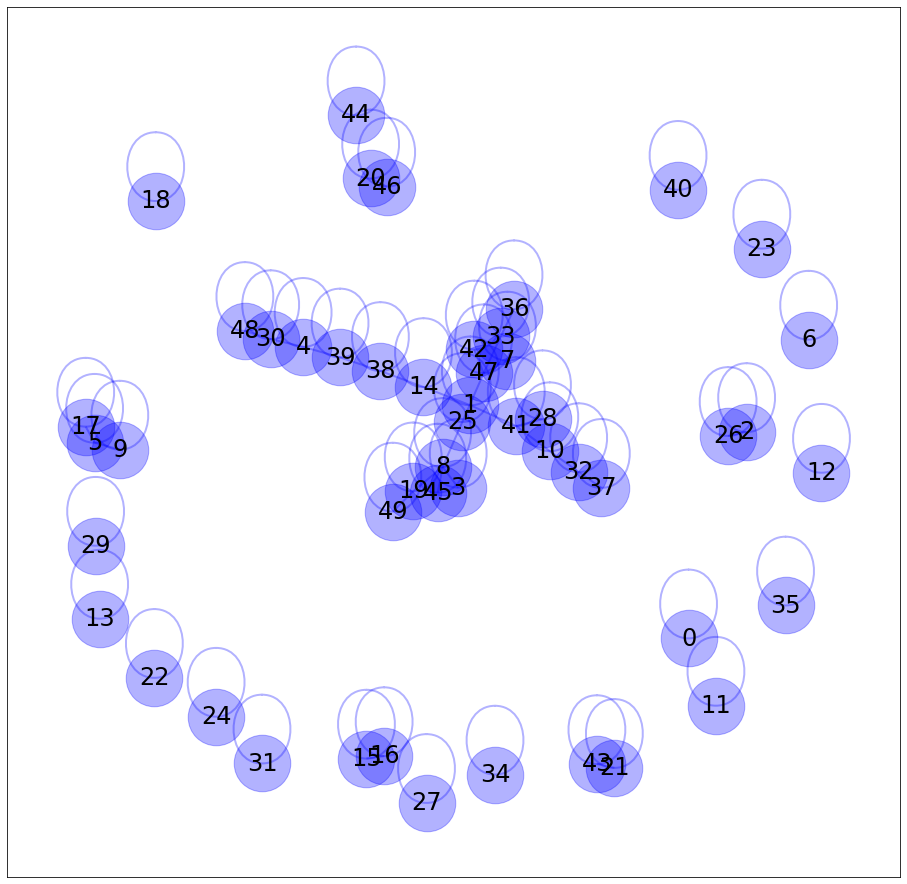

In [23]:
plt.figure(figsize=(16, 16))
draw_graph(graph, graph_layout='spring')

#### Transition 3: If $np → c > 1$, where $c$ is a constant, then a graph in $\operatorname{G}(n,p)$ will almost surely have a unique giant component containing a positive fraction of the vertices. No other component will contain more than $\operatorname{O}(\log(n))$ vertices.

We'll increase the number of nodes by a factor of 10 here so we can see this more clearly. Pay attention to the precipitous decline from the size of the largest connected component to that of all the rest.

In [24]:
largest_sizes = []
epsilon = 1/10000
n = 5000
p = 1/5000 + epsilon
graph = G(n,p)

print("The sorted sizes of the components are:")
print(sorted(component_sizes(graph))[::-1])
print("No other component should have size more than on the order of:", np.log2(n))

The sorted sizes of the components are:
[2927, 38, 16, 13, 12, 11, 11, 10, 10, 10, 10, 9, 9, 9, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

#### Transition 4: If $p<\tfrac{(1-\epsilon)\ln n}{n}$, then a graph in $\operatorname{G}(n,p)$ will almost surely contain isolated vertices, and thus be disconnected.

This may take several minutes.

In [25]:
largest_sizes = []
epsilon = .1
n = 10000
p = (1-epsilon)*np.log(n) / n
num_isolated = 0
trials = 10
for _ in range(trials):
    graph = G(n,p)
    print('List of component sizes:', component_sizes(graph))
    if 1 in component_sizes(graph):
        num_isolated += 1
print("Probability of graphs containing isolated vertices: ", num_isolated / trials)

List of component sizes: [10000]
List of component sizes: [9996, 1, 1, 1, 1]
List of component sizes: [9999, 1]
List of component sizes: [9998, 1, 1]
List of component sizes: [9997, 1, 1, 1]
List of component sizes: [10000]
List of component sizes: [9999, 1]
List of component sizes: [9995, 1, 1, 1, 1, 1]
List of component sizes: [9999, 1]
List of component sizes: [9995, 1, 1, 1, 1, 1]
Probability of graphs containing isolated vertices:  0.8


#### Transition 5: If $p>\tfrac{(1+\epsilon)\ln n}{n}$, then a graph in $\operatorname{G}(n,p)$ will almost surely be connected.

This may take several minutes.

In [ ]:
largest_sizes = []
epsilon = 1/3
n = 10000
p = (1+epsilon)*np.log(n) / n
num_isolated = 0
trials = 10
for _ in range(trials):
    graph = G(n,p)
    print('List of component sizes:', component_sizes(graph))
    if 1 in component_sizes(graph):
        num_isolated += 1
print("Probability that graphs are connected: ", 1 - num_isolated / trials)

Cool! Now we've experimentally verified the results of the Erdős–Rényi paper. 

Isn't it neat that you can rigorously formalize this kind of qualitative behavior of a graph, and then clearly see these transitions in simulation? 

## Question 3 -- The Stochastic Block Model

So far we've discussed the Erdős–Rényi model of a random graph $G(n,p)$. There are extensions that are better, more realistic models in many situations.

As a motivating example, consider the graph formed by friendships of Berkeley students and Stanford students on Facebook.  The probability of a friendship between two students both attending UC Berkeley is much higher than the probability that a student from UC Berkeley is friends with a student from Stanford. In the Erdos-Renyi model, however, the two edges formed by these friendships have the same probability!

In this section, we will explore communities such as the following:

<img src="https://data.graphstream-project.org/talks/CSSS2012/media/Community_Structure2.jpg" width=300 />

How will we do this? Use the <b>stochastic block model</b> (let's call it SBM) -- we have graphs of $G(n,p,q)$ (for simplicity, let's assume $n$ is even and $p>q$). 

In this model, we have two "communities" each of size $\frac{n}{2}$ such that the probability of an edge existing between any two nodes within a community is $p$ and the probability of an edge between the two communities is $q$.
<img src="http://i.imgur.com/JAPqQNf.png" width="400" height="400" />

Our goal will be to recover the original communities. For this example, the result would look something like:
<img src="http://i.imgur.com/Ec2Xehs.png" width="450" height="450" />
Let's begin by defining a function to generate graphs according to the stochastic block model.

### 3a. Fill out the following function to create a graph $G(n,p,q)$ according to the SBM.

**Important Note**: make sure that the first $\frac{n}{2}$ nodes are part of community A and the second $\frac{n}{2}$ nodes are part of community B.

We will be using this assumption for later questions in this lab, when we try to recover the two communities.

In [26]:
def G(n,p,q):
    """
    Let the first n/2 nodes be part of community A and 
    the second n/2 part of community B.
    """
    assert(n % 2 == 0)
    assert(p > q)
    mid = int(n/2)
    graph = []
    for i in range(n):
        graph.append((i,i))
        
    #Make community A
    for i in range(mid):
        for j in range(i+1, mid):
            ### YOUR CODE HERE
            if np.random.rand() < p:
                graph.append((i, j))
                
    #Make community B
    for i in range(mid, n):
        for j in range(i+1,n):
            ### YOUR CODE HERE
            if np.random.rand() < p:
                graph.append((i, j))
                
    #Form connections between communities
    for i in range(mid):
        for j in range(mid, n):
            if np.random.rand() < q:
                graph.append( (i, j) )
    return graph

Let's try testing this out with an example graph -- check that it looks right!

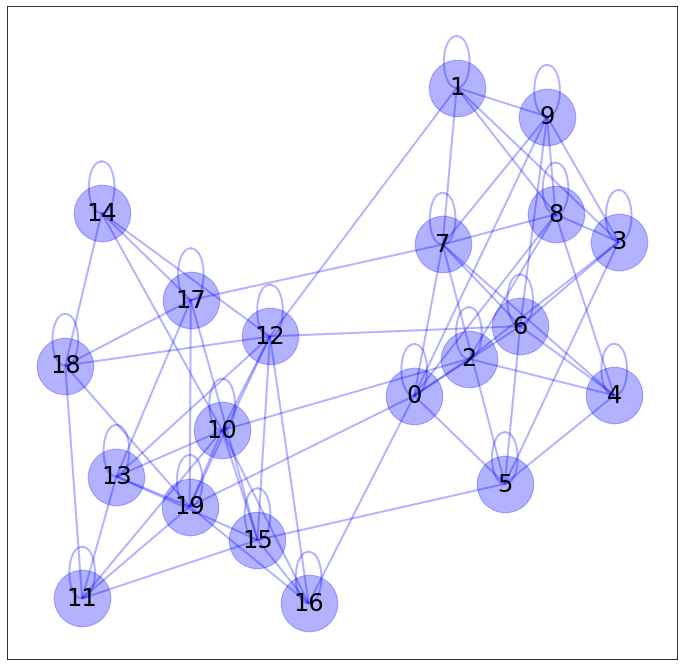

In [27]:
graph = G(20,0.6,0.05)
plt.figure(figsize=(12, 12))
draw_graph(graph,graph_layout='spring')

Now recall the previous example:
<img src="http://i.imgur.com/Ec2Xehs.png" width="450" height="450" />


How did we determine the most likely assignment of nodes to communities?

An intuitive approach is to find the **min-bisection** -- the split of $G$ into 2 groups each of size $\frac{n}{2}$ that has the *minimum total edges crossing the partition*. The intuition here is that we want to **minimize** friendships across communities, as under our assumptions, **p > q** so it is more likely to be friends within a community than across. Notice, if we assume that **p < q**, then we would have been interested in the max-bisection.

It turns out that this approach is the optimal method of recovering community assignments in terms of maximizing over all possible partitions the probability of seeing the graph $G$ given a community partition. This is called the Maximum Likelihood Estimate (MLE) of the partition given the graph G. It is an interesting exercise to prove this which you can try if you would like. You will prove this result in homework when we go over Maximum Likelihood Estimation and Maximum A Posteriori Estimation.


### 3b. Given a graph $G(n,p,q)$, write a function to find the maximum likelihood estimate of the two communities.

In [28]:
#Helper Functions
from collections import defaultdict
import itertools

def adjacency_list(graph):
    """
    Takes in the current representation of the graph, outputs an equivalent
    adjacenty list
    """
    adj_list = defaultdict(set)
    for node in graph:
        adj_list[node[0]].add(node[1])
        adj_list[node[1]].add(node[0])
    return adj_list
        
#Return a list of nodes in the graph
nodes = lambda adj_list: list(adj_list)

#Return a list of possible communities
possible_communities = lambda nodes: set(itertools.combinations(nodes, int(len(nodes)/2)))

#Return the degree of a specific node
deg = lambda node, adj_list: len(adj_list[node]) - 1 #Subtract the self loop

def community_degree(community, adj_list):
    """
    Return the number of edges between nodes in the given community
    """
    total_edges = 0
    for node in community:
        for adjacent_node in adj_list[node]:
            if adjacent_node in community:
                total_edges += 1
    return total_edges


In [29]:
def mle(graph):
    """
    Return a list of size n/2 that contains the nodes of one of the 
    two communities in the graph obtained from the min bisection rule.
    
    The other community is implied to be the set of of nodes that
    aren't in the returned result of this function.
    """
    adj_list = adjacency_list(graph)
    all_nodes = nodes(adj_list)
    possible_comms = possible_communities(all_nodes)
    max_community = None
    max_connections = 0
    for communityA in possible_comms:
        communityB = set(all_nodes).difference(set(communityA)) # This produces all the nodes in the other community
        d = community_degree(communityA, adj_list) + community_degree(communityB, adj_list)
        if d > max_connections:
            max_connections = d
            max_community = communityA
    return max_community

Here's a quick test for your MLE function -- check that the resulting partitions look okay!

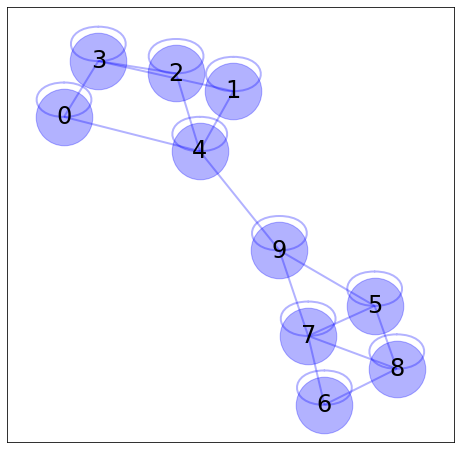

In [31]:
graph = G(10,0.6,0.05)
plt.figure(figsize=(8, 8))
draw_graph(graph,graph_layout='spring')

In [32]:
community = mle(graph)
assert len(community) == 5

print('The community found is the nodes', community)

The community found is the nodes (5, 6, 7, 8, 9)


One interesting followup question is if we can determine when the MLE will exactly recover the communities as a function of $(p,q,n)$.

It turns out that there is a threshold on $(p,q,n)$ for a phase transition which determines whether or not the communities can be recovered using MLE. This means there exists a function $f$, where the threshold for exact recovery occurs at 

$$f(p,q,n) > 1$$

After this threshold, we can recover the original communities with high probability in the SBM.

You are not required to solve for this threshold, but are encouraged to think about how it should look, and check it out in the solutions. Congratulations on finishing the lab!

## References

1. https://www.udacity.com/wiki/creating-network-graphs-with-python